### Machine Learning - A Tutorial
<img src="http://www.buffalo.edu/content/www/cdse/cdse-days/WorkshopII/_jcr_content/par/image.img.original.png/1458248800022.png">
### Presenter :: Varun Chandola (chandola@buffalo.edu)
#### Assistant Professor, Computer Science and Engineering, Computational and Data-Enabled Science and Engineering
#### March 24, 2016 

** Material for the tutorial **
- Slides: https://github.com/ubdsgroup/cdsedaystutorial/blob/master/talk.pdf
- Notebook: http://nbviewer.jupyter.org/github/ubdsgroup/cdsedaystutorial/blob/master/MachineLearningBasics.ipynb
- Git Repo: https://github.com/ubdsgroup/cdsedaystutorial.git

## A practical introduction to IPython Notebook
## Some notes about installation:

### Don't do this:

```
sudo apt-get install ipython-notebook
```

### Instead, do this:

```
pip install ipython tornado pyzmq
```

or install Anaconda from [http://store.continuum.io](http://store.continuum.io)

You can start IPython notebook by running

```
ipython notebook --pylab inline
```

### Scikit-learn (or sklearn)
A Python Machine Learning Library.

http://scikit-learn.org/stable/index.html

#### Data sets in sklearn
Many standard (synthetic and real) benchmark data sets are preloaded. See below

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

from sklearn.datasets import make_circles, load_boston, load_iris
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import cross_validation

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 

%matplotlib inline

### PART 1 - Demonstrating impact of overfitting with Regression and Classification

Accuracy on Training Data: 100.00
Accuracy on Testing  Data: 62.50


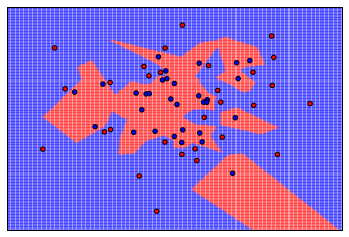

In [26]:
# Classification
h = .02  # step size in the mesh
ds = make_circles(noise=0.4, factor=0.5, random_state=1)
# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

classifier = KNeighborsClassifier(1)
classifier.fit(X_train, y_train)

Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cm_bright,alpha=.2)
ax = plt.gca()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
#plt.savefig('/Users/chandola/Research/tutorials/cdsedays_mltutorial/rawfigs/overfitting_class.png',format='png',dpi=384)
print "Accuracy on Training Data: %.2f"%(100*classifier.score(X_train,y_train))
print "Accuracy on Testing  Data: %.2f"%(100*classifier.score(X_test,y_test))

Goodness of fit on training data: 0.97
Goodness of fit on test     data: 0.52


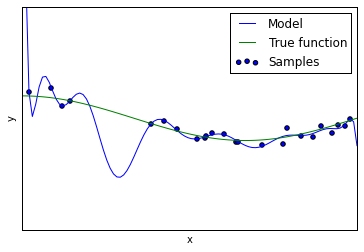

In [124]:
# Regression
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

i = 15
ax = plt.gca()
plt.setp(ax, xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=i,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)

# Evaluate the models using crossvalidation
scores = cross_validation.cross_val_score(pipeline,
    X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

X_all = np.linspace(0, 1, 100)
plt.plot(X_all, pipeline.predict(X_all[:, np.newaxis]), label="Model")
plt.plot(X_all, true_fun(X_all), label="True function")
plt.scatter(X_train, y_train, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-5, 5))
plt.legend(loc="best")

print "Goodness of fit on training data: %.2f"%pipeline.score(X_train[:, np.newaxis],y_train)
print "Goodness of fit on test     data: %.2f"%pipeline.score(X_test[:, np.newaxis],y_test)


### PART 2 - Demonstrating benefits of regularization

#### Ridge Regression
$
\widehat{\bf w} = argmin_{\bf w} J({\bf w}) + \alpha \Vert {\bf w}\Vert^2\\
$
#### LASSO
$
\widehat{\bf w} = argmin_{\bf w} J({\bf w}) + \alpha \vert {\bf w}\vert\\
$


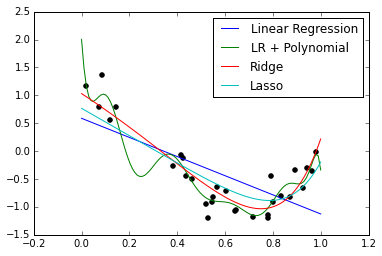

In [71]:
rng = np.random.RandomState(0)
# Generate sample data
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2
X = X[:,np.newaxis]
# Learn linear regression model
lrmodel = LinearRegression()
lrmodel.fit(X,y)
# Do polynomial basis expansion
polynomial_features = PolynomialFeatures(degree=12,include_bias=False)
# fit linear model on expanded features
lrmodel1 = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", lrmodel1)])
pipeline.fit(X,y)
# fit ridge regression model on expanded features
rrmodel = Ridge(alpha=0.1)
pipeline1 = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", rrmodel)])
pipeline1.fit(X,y)
# fit LASSO on expanded features
llmodel = Lasso(alpha=0.02)
pipeline2 = Pipeline([("polynomial_features", polynomial_features),
                     ("lasso_regression", llmodel)])
pipeline2.fit(X,y)
# plot the fitted lines
X_all = np.linspace(0, 1, 100)
plt.plot(X_all, lrmodel.predict(X_all[:, np.newaxis]))
plt.plot(X_all, pipeline.predict(X_all[:, np.newaxis]))
plt.plot(X_all, pipeline1.predict(X_all[:, np.newaxis]))
plt.plot(X_all, pipeline2.predict(X_all[:, np.newaxis]))
plt.scatter(X,y, c='k', label='data')
plt.legend(['Linear Regression','LR + Polynomial','Ridge','Lasso'])

### 2.1 Demonstrating the role of ridge regression in handling correlated features

In [72]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, intercept, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(1,1+len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "%6.3f"%intercept+" + " +" + ".join("%6.3f * %s" % (coef, name)
                                   for coef, name in lst)

In [83]:
# first observe how LinearRegression produces unstable results
size = 100
for i in range(10):
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
    lr = LinearRegression()
    lr.fit(X,Y)
    print "Linear model:", pretty_print_linear(lr.coef_,lr.intercept_)


Linear model: -0.021 +  0.728 * X1 +  2.309 * X2 + -0.082 * X3
Linear model:  0.062 +  1.152 * X1 +  2.366 * X2 + -0.599 * X3
Linear model: -0.179 +  0.697 * X1 +  0.322 * X2 +  2.086 * X3
Linear model:  0.065 +  0.287 * X1 +  1.254 * X2 +  1.491 * X3
Linear model:  0.035 +  0.187 * X1 +  0.772 * X2 +  2.189 * X3
Linear model: -0.058 + -1.291 * X1 +  1.591 * X2 +  2.747 * X3
Linear model: -0.077 +  1.199 * X1 + -0.031 * X2 +  1.915 * X3
Linear model: -0.138 +  1.474 * X1 +  1.762 * X2 + -0.151 * X3
Linear model:  0.032 +  0.084 * X1 +  1.880 * X2 +  1.107 * X3
Linear model:  0.048 +  0.714 * X1 +  0.776 * X2 +  1.364 * X3


In [85]:
# Now observe how RidgeRegression produces stable results
size = 100
for i in range(10):
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
    lr = Ridge(alpha=10)
    lr.fit(X,Y)
    print "Ridge model:", pretty_print_linear(lr.coef_,lr.intercept_)


Ridge model: -0.007 +  0.938 * X1 +  1.059 * X2 +  0.877 * X3
Ridge model:  0.076 +  0.984 * X1 +  1.068 * X2 +  0.759 * X3
Ridge model: -0.158 +  0.972 * X1 +  0.943 * X2 +  1.085 * X3
Ridge model:  0.058 +  0.919 * X1 +  1.005 * X2 +  1.033 * X3
Ridge model:  0.042 +  0.964 * X1 +  0.982 * X2 +  1.098 * X3
Ridge model: -0.035 +  0.758 * X1 +  1.011 * X2 +  1.139 * X3
Ridge model: -0.085 +  1.016 * X1 +  0.890 * X2 +  1.091 * X3
Ridge model: -0.125 +  1.018 * X1 +  1.039 * X2 +  0.901 * X3
Ridge model:  0.034 +  0.907 * X1 +  1.071 * X2 +  1.008 * X3
Ridge model:  0.044 +  0.896 * X1 +  0.903 * X2 +  0.980 * X3


### 2.2 Demonstrating the role of Lasso in inducing sparsity
We will use the Boston housing data set to study this phenomenon

In [130]:
boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]

In [137]:
# fit linear regression
lrmodel = LinearRegression()
lrmodel.fit(X, Y)
scores = -np.mean(cross_validation.cross_val_score(lrmodel,
    X, Y, scoring="mean_squared_error", cv=10))
print "Cross validation error: %.4f"%scores
print "Linear regression model: ", pretty_print_linear(lrmodel.coef_, lrmodel.intercept_, names, sort = True)

Cross validation error: 34.7631
Linear regression model:  22.533 + -3.749 * LSTAT + -3.104 * DIS +  2.671 * RM +  2.659 * RAD + -2.076 * TAX + -2.062 * PTRATIO + -2.060 * NOX +  1.081 * ZN + -0.920 * CRIM +  0.857 * B +  0.682 * CHAS +  0.143 * INDUS +  0.021 * AGE


In [145]:
# fit Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(X, Y)
scores = -np.mean(cross_validation.cross_val_score(lasso,
    X, Y, scoring="mean_squared_error", cv=10))
print "Cross validation error: %.4f"%scores
print "Lasso model: ", pretty_print_linear(lasso.coef_, lasso.intercept_, names, sort = True)

Cross validation error: 34.6789
Lasso model:  22.533 + -3.707 * LSTAT +  2.992 * RM + -1.757 * PTRATIO + -1.081 * DIS + -0.700 * NOX +  0.631 * B +  0.540 * CHAS + -0.236 * CRIM +  0.081 * ZN + -0.000 * INDUS + -0.000 * AGE +  0.000 * RAD + -0.000 * TAX


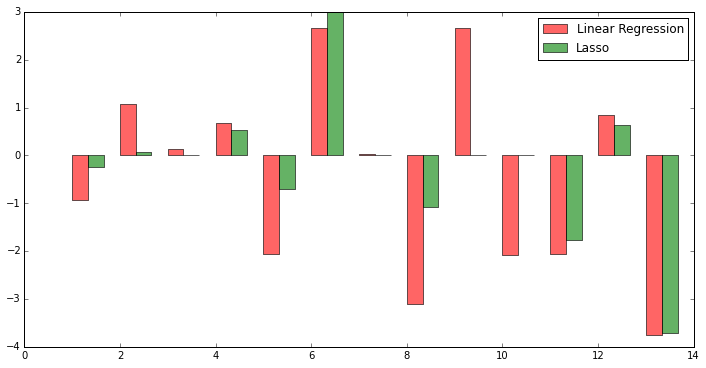

In [147]:
# comparing the two for sparsity
fig = plt.figure(figsize=[12,6])
plt.bar(range(1,len(lrmodel.coef_)+1),lrmodel.coef_,color='red',width=0.33,alpha=0.6)
plt.bar(np.arange(1.33,len(lrmodel.coef_)+1),lasso.coef_,color='green',width=0.33,alpha=0.6)
plt.legend(['Linear Regression', 'Lasso'])

### PART 3: Demonstrating Support Vector Machines
We first show how linear SVM cannot handle all types of classification task and how using kernels help

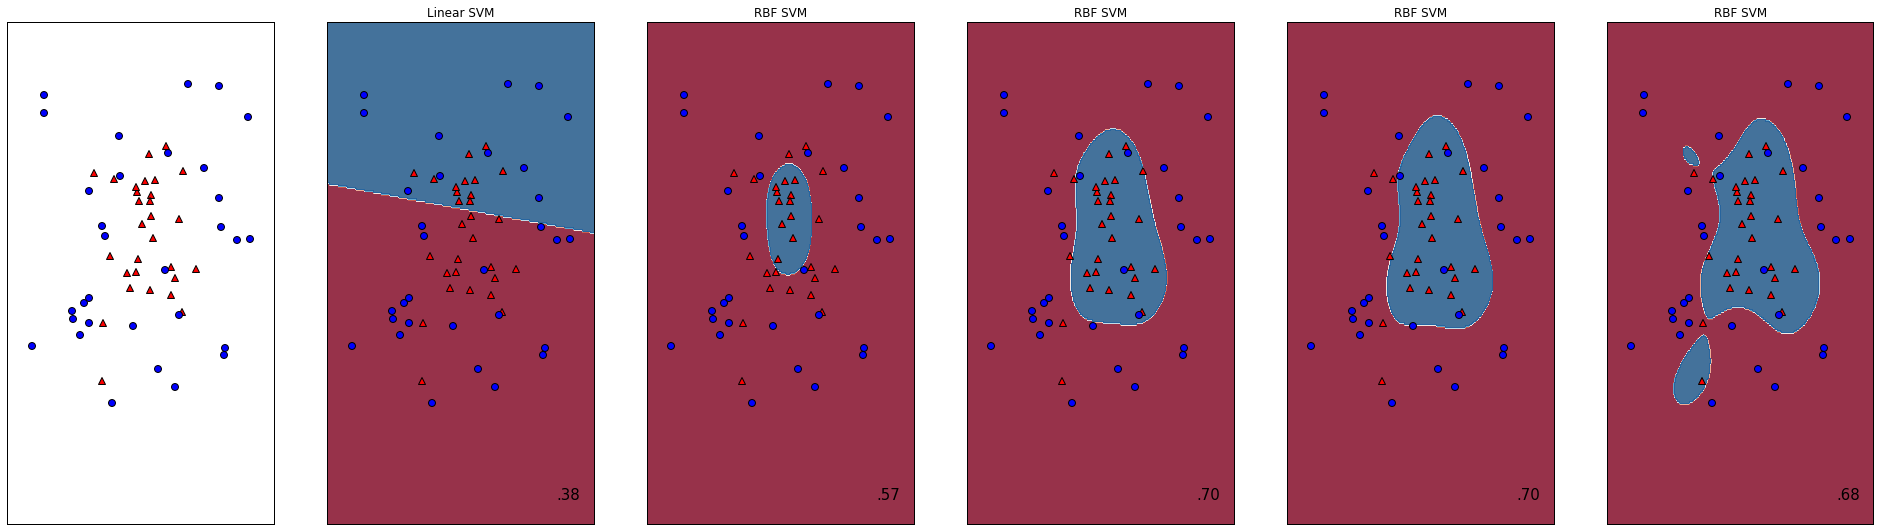

In [236]:
h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM","RBF SVM","RBF SVM","RBF SVM"]
classifiers = [
    svm.LinearSVC(),
    svm.SVC(gamma=2, C=0.1),
    svm.SVC(gamma=2, C=0.5),
    svm.SVC(gamma=2, C=1.0),    
    svm.SVC(gamma=2, C=4.0)    
]

ds = make_circles(noise=0.4, factor=0.2, random_state=1)

figure = plt.figure(figsize=(27, 9))

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, 1)
# Plot the training points
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    i += 1
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    # Plot also the training points
    ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
    ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
figure.subplots_adjust(left=.02, right=.98)
plt.show()

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:
- Sepal length
- Sepal width

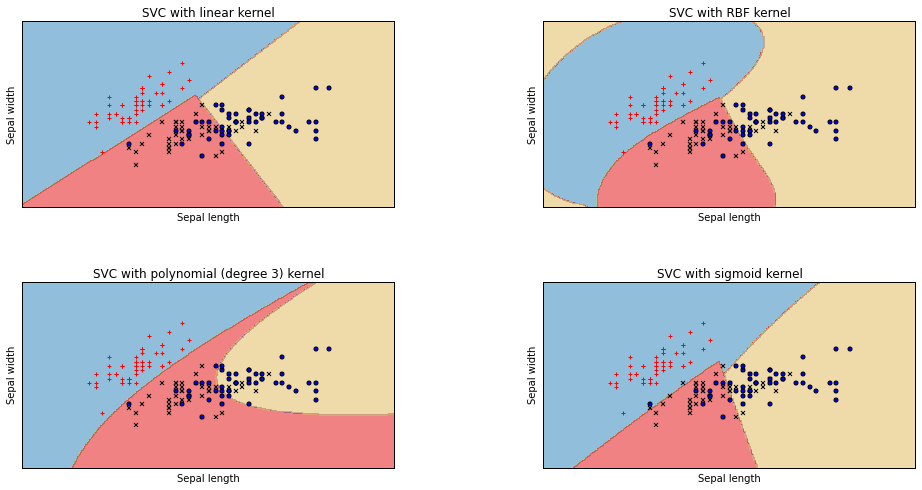

In [187]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
sigmoid_svc = svm.SVC(kernel='sigmoid', gamma=0.01).fit(X,y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
         'SVC with sigmoid kernel']

fig = plt.figure(figsize=[16,8])
for i, clf in enumerate((svc, rbf_svc, poly_svc, sigmoid_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)

    # Plot also the training points
    plt.scatter(X[y==0, 0], X[y==0, 1],marker='+',c='r',s=16)
    plt.scatter(X[y==1, 0], X[y==1, 1],marker='x',c='k',s=16)
    plt.scatter(X[y==2, 0], X[y==2, 1],marker='o',c='b',s=16)
    #, c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### PART 4 - Playing with Decision Trees
We will use the Iris data we used in the previous example

In [246]:
from IPython.display import Image
Image(url="http://upload.wikimedia.org/wikipedia/commons/e/ea/Anderson%27s_Iris_data_set.png", width=600)


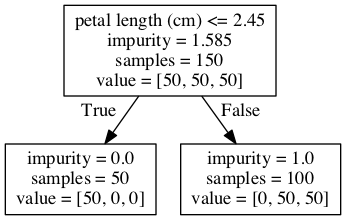

In [251]:
# first learn a one depth tree
d = 1  #set depth to 1

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset
dotfile = open("tree_d1.dot", 'w')
dot_file = tree.export_graphviz(clf.tree_, out_file=dotfile, feature_names=iris.feature_names)  #export the tree to .dot file
dotfile.close() #close that dot file.

! dot -Tpng tree_d1.dot -o tree_d1.png #use the 'dot' command to convert the .dot file to an image
    
Image(filename='tree_d1.png')  # display the image.

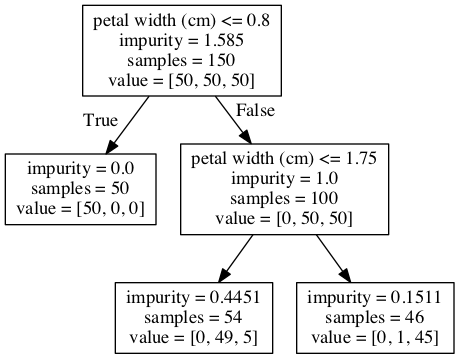

In [252]:
# now let us make the tree deeper
d = 2  #set depth to 2

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset
dotfile = open("tree_d2.dot", 'w')
dot_file = tree.export_graphviz(clf.tree_, out_file=dotfile, feature_names=iris.feature_names)  #export the tree to .dot file
dotfile.close() #close that dot file.

! dot -Tpng tree_d2.dot -o tree_d2.png #use the 'dot' command to convert the .dot file to an image
    
Image(filename='tree_d2.png')  # display the image.

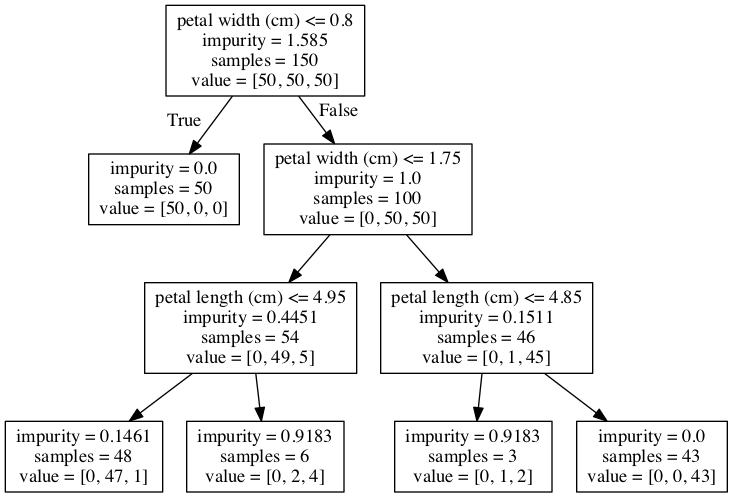

In [253]:
# now let us make the tree even deeper
d = 3  #set depth to 3

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset
dotfile = open("tree_d3.dot", 'w')
dot_file = tree.export_graphviz(clf.tree_, out_file=dotfile, feature_names=iris.feature_names)  #export the tree to .dot file
dotfile.close() #close that dot file.

! dot -Tpng tree_d3.dot -o tree_d3.png #use the 'dot' command to convert the .dot file to an image
    
Image(filename='tree_d3.png')  # display the image.

### Visualizing the decision boundaries

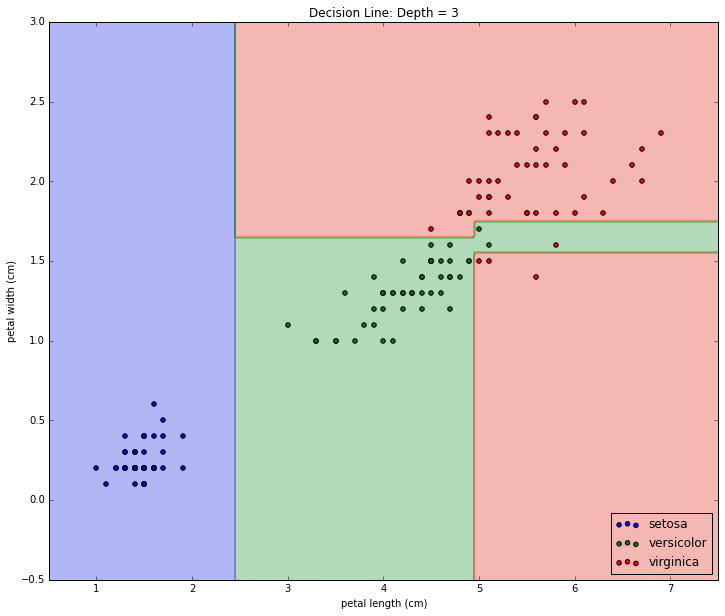

In [261]:
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

plt.figure(3,figsize=(12,10))
plt.title("Decision Line: Depth = 3")
plt.xlabel(iris.feature_names[3])
plt.ylabel(iris.feature_names[2])
plt.xlim([0.5,7.5])
plt.ylim([-0.5,3])

# CHANGED: loop removed, pair = [2,3] is enough
pair = [2,3]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

dont_care = np.zeros(shape=xx.ravel().shape)

Z = clf.predict(np.c_[dont_care,dont_care, xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])


plt.legend(loc='lower right')

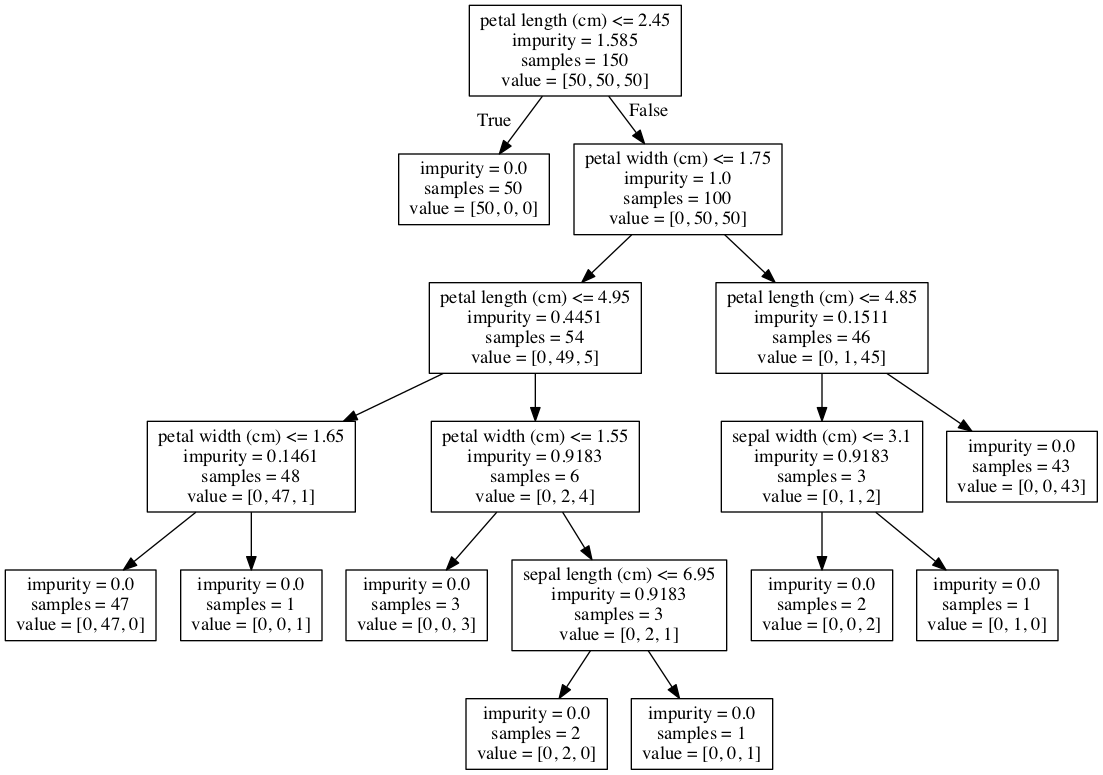

In [260]:
# now let us learn the full tree

clf = DecisionTreeClassifier(criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset
dotfile = open("tree_full.dot", 'w')
dot_file = tree.export_graphviz(clf.tree_, out_file=dotfile, feature_names=iris.feature_names)  #export the tree to .dot file
dotfile.close() #close that dot file.

! dot -Tpng tree_full.dot -o tree_full.png #use the 'dot' command to convert the .dot file to an image
    
Image(filename='tree_full.png')  # display the image.